In [4]:
from predict import predict
from displayData import displayData
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from nnCostFunction import nnCostFunction
from checkNNGradients import checkNNGradients
from fmincg import fmincg
import scipy.io
import numpy as np

In [2]:
input_layer_size = 400     # 20x20 Input Images of Digits
hidden_layer_size = 25     # 25 hidden units
num_labels = 10            # 10 labels, from 0 to 9

In [5]:
mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

[1468 3955 3654 4914 2989 2845 2112 1962  231 1991 2826 1084 2424 2999
  540 4559 4847  364  208 2333 2533 4225  520 1339 2050 1073 1016 3325
 1054 2862  391 3748 4803 3227 3573 4308 3615 1136 4845  113 4183 1378
 2913 3756 4055 2073 4797 4152 1360  169 3097 1348  357 3791 1739 2623
 4223 3885  751 1144 4499 1907 4651 3191 4346 4082  856 1066 3710 4154
  101  553   95 1123 2215  413  459  322 3590  546 4995  136 1228 4763
 1394  494 4033 3716  154 1343 4802 2865 1171 3979 4098 3089 1681  381
 4829 3775]
[ 2  7  7  9  5  5  4  3 10  3  5  2  4  5  1  9  9 10 10  4  5  8  1  2
  4  2  2  6  2  5 10  7  9  6  7  8  7  2  9 10  8  2  5  7  8  4  9  8
  2 10  6  2 10  7  3  5  8  7  1  2  8  3  9  6  8  8  1  2  7  8 10  1
 10  2  4 10 10 10  7  1  9 10  2  9  2 10  8  7 10  2  9  5  2  7  8  6
  3 10  9  7]


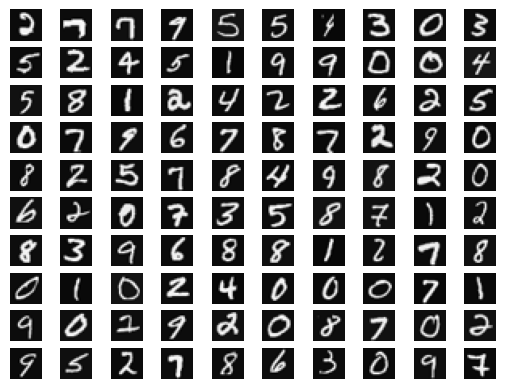

In [11]:

# Randomly select 100 data points to display
choose_indexes = np.random.choice(range(X.shape[0]), 100)
print(choose_indexes)
Xs = X[choose_indexes, :]
Ys = y[choose_indexes]
print(Ys)

displayData(Xs)

In [12]:
# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat')

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

In [17]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: ', (pred == y).mean()*100)
print(y)
print(pred)

Training Set Accuracy:  69.62
[10 10 10 ...  9  9  9]
[10. 10.  8. ...  9.  8.  8.]
